   Unnamed: 0       car_name    brand     model  vehicle_age  km_driven  \
0           0    Maruti Alto   Maruti      Alto            9     120000   
1           1  Hyundai Grand  Hyundai     Grand            5      20000   
2           2    Hyundai i20  Hyundai       i20           11      60000   
3           3    Maruti Alto   Maruti      Alto            9      37000   
4           4  Ford Ecosport     Ford  Ecosport            6      30000   

  seller_type fuel_type transmission_type  mileage  engine  max_power  seats  \
0  Individual    Petrol            Manual    19.70     796      46.30      5   
1  Individual    Petrol            Manual    18.90    1197      82.00      5   
2  Individual    Petrol            Manual    17.00    1197      80.00      5   
3  Individual    Petrol            Manual    20.92     998      67.10      5   
4      Dealer    Diesel            Manual    22.77    1498      98.59      5   

   selling_price  
0         120000  
1         550000  
2         2

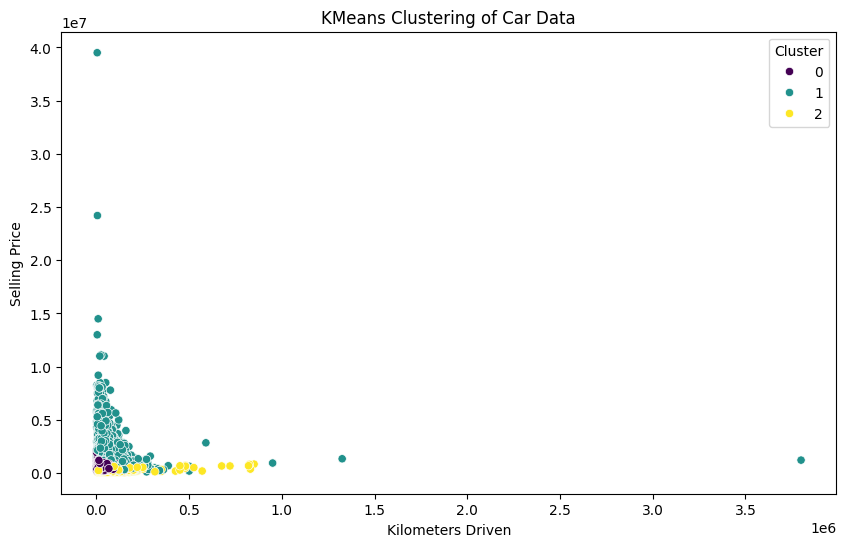

done


In [3]:
# Importing necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
file_path = 'cardekho_dataset.csv'
df = pd.read_csv(file_path)

# Displaying the head of the dataframe to understand its structure
print(df.head())

# Selecting relevant features for clustering
features = df[['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']]

# Checking for null values and data types
print(features.isnull().sum())
print(features.dtypes)

# Dropping rows with null values
features = features.dropna()

# Normalizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Applying KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

# Adding the cluster labels to the original dataframe
df['Cluster'] = clusters

# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='km_driven', y='selling_price', hue='Cluster', palette='viridis')
plt.title('KMeans Clustering of Car Data')
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price')
plt.legend(title='Cluster')
plt.show()

print('done')